# 2조 최하민 공공데이터 파싱 & 시각화
* 1년동안 분실된 휴대폰개수 그래프
* seaborn 모듈 countplot함수를 이용해 종류별 개수를 그래프로 표현(2021년 12월)
* 최근 1년 분실물 막대그래프(종류별 일일개수)
* 2022년 1월 1일 ~ 1월 6일까지의 분실물 종류와 개수
* 월별 분실물 종류별 합계
* 1년 분실물 종류별 합계
* 월별 분실물 총 합계 막대그래프
* 월별 분실물의 종류별 빈도를 나타낸 파이차트

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
import seaborn as sns
from matplotlib import rcParams

cv_test = pd.read_csv("C:/Users/BIT/Downloads/project_1.csv", encoding='utf-8') #다운받은 csv파일 불러오기
plt.rc('font', family='Malgun Gothic') #현재 rcParams을  맑은고딕폰트로 설정해준다.
plt.rcParams['axes.unicode_minus'] = False #마이너스 기호의 깨짐 방지
# cv_test['등록일자'] = pd.to_datetime(cv_test['등록일자']) #등록일자의 데이터 타입이 object인 문자열 형식이기때문에 필요에 따라 datetime인 날짜형식으로 바꾸어 주기 위해 써놓음

In [461]:
a = cv_test.sort_values(by = '등록일자', ascending = False) #등록일자 기준으로 내림차순 정렬
a = a.dropna()

In [462]:
b = pd.DataFrame(a, columns = ['등록일자', '분실물종류']) #등록일자와 분실물종류만 추출해서 b에 저장
b = b.reset_index() #등록일자기준으로 내림차순되어있는 데이터프레임은 인덱스번호가 뒤죽박죽이기에 리셋시킴
num = pd.DataFrame({ 'Num' : range(1, 275522)})
c = pd.concat([num, b], axis=1) #컬럼명은 Num이고 1부터 275521까지 적혀있는 데이터프레임과 b의 데이터프레임을 옆으(가로)로 합치고 c에 저장
d = pd.DataFrame(c, columns = ['Num','등록일자','분실물종류']) #대괄호 안에있는 컬럼명만 빼서 d에 저장
d = d.dropna()

In [445]:
###loc로 최근 1년과 최근 1년 월별로 끊어서 각각 데이터프레임을 만드는 과정
years = d.loc[0:1520]
January = d.loc[1435:1538]
February = d.loc[1342:1434]
March = d.loc[1202:1341]
April = d.loc[1072:1201]
May = d.loc[922:1071]
June = d.loc[730:921]
July = d.loc[643:729]
August = d.loc[539:642]
September = d.loc[414:538]
October = d.loc[303:413]
November =  d.loc[162:302]
December = d.loc[41:161]
Recent = d.loc[0:40]

###월별 분실물종류별 합계
January_df = January['분실물종류'].value_counts().rename_axis('1월').reset_index(name='합계')
February_df = February['분실물종류'].value_counts().rename_axis('2월').reset_index(name='합계')
March_df = March['분실물종류'].value_counts().rename_axis('3월').reset_index(name='합계')
April_df = April['분실물종류'].value_counts().rename_axis('4월').reset_index(name='합계')
May_df = May['분실물종류'].value_counts().rename_axis('5월').reset_index(name='합계')
June_df = June['분실물종류'].value_counts().rename_axis('6월').reset_index(name='합계')
July_df = July['분실물종류'].value_counts().rename_axis('7월').reset_index(name='합계')
August_df = August['분실물종류'].value_counts().rename_axis('8월').reset_index(name='합계')
September_df = September['분실물종류'].value_counts().rename_axis('9월').reset_index(name='합계')
October_df = October['분실물종류'].value_counts().rename_axis('10월').reset_index(name='합계')
November_df = November['분실물종류'].value_counts().rename_axis('11월').reset_index(name='합계')
December_df = December['분실물종류'].value_counts().rename_axis('12월').reset_index(name='합계')
years_df = years['분실물종류'].value_counts().rename_axis('1년').reset_index(name='합계')

## 1년동안 분실된 휴대폰개수 그래프

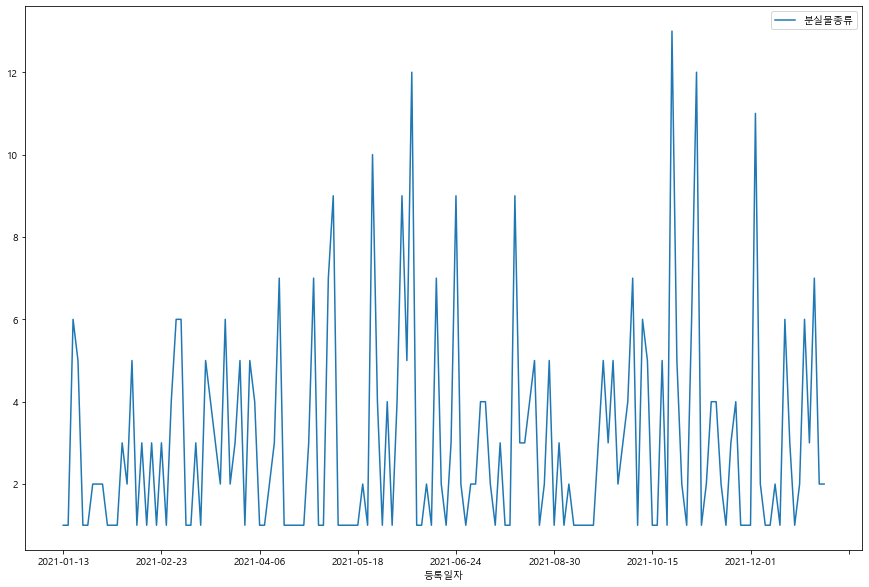

In [460]:
year_new = years.groupby(['등록일자','분실물종류'])['분실물종류'].count()
year_new = pd.DataFrame(year_new)
year_new.xs(('핸드폰'),level = '분실물종류',axis = 0)
yn = year_new.xs(('핸드폰'),level = '분실물종류')
yn.plot(figsize=(15,10))
plt.show()

## seaborn 모듈 countplot함수를 이용해 종류별 개수를 그래프로 표현(2021년 12월)

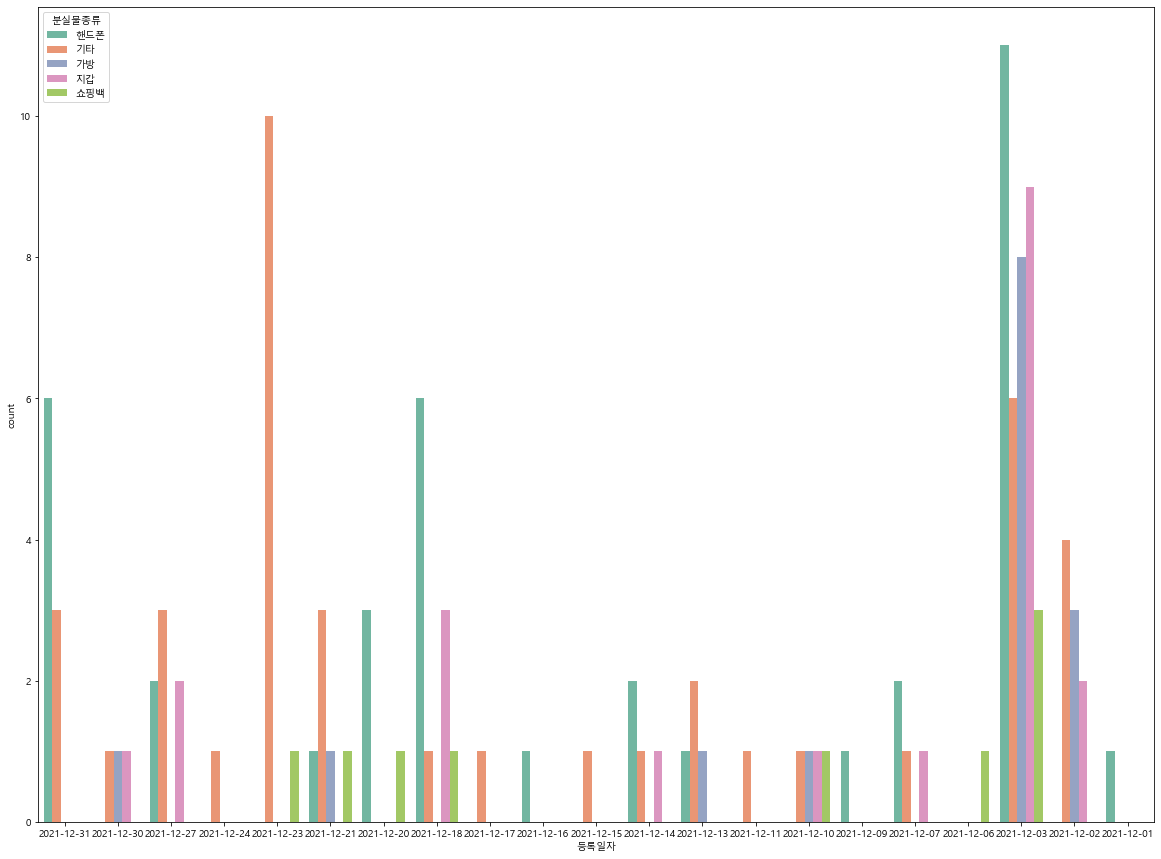

In [433]:
sns.countplot(x="등록일자", hue="분실물종류", data=December, palette="Set2")
plt.show()

## 최근 1년 분실물 막대그래프(종류별 일일개수)

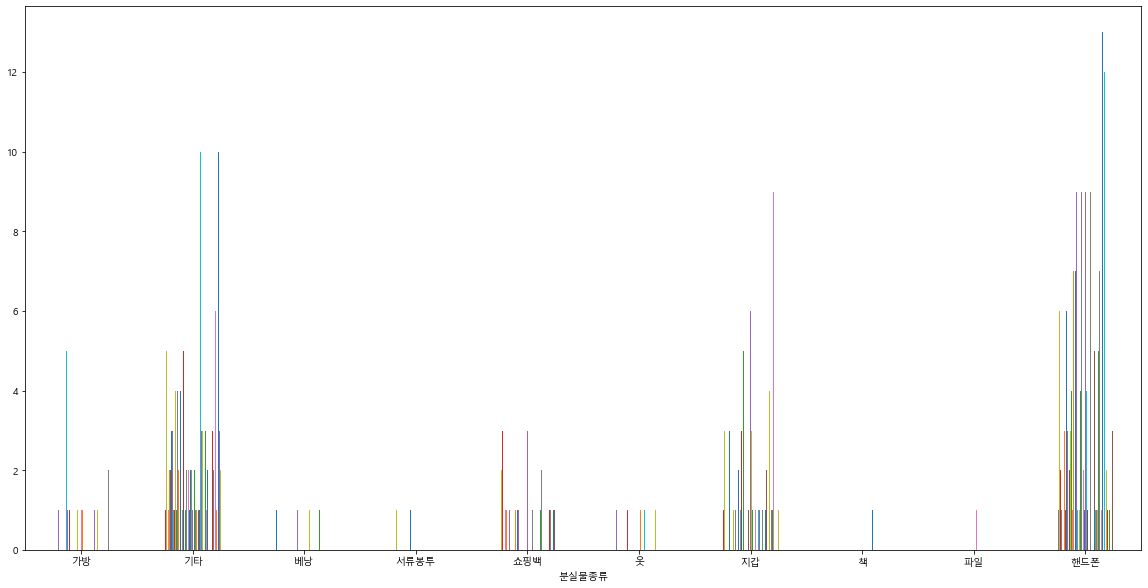

In [444]:
years_new = years.groupby(['등록일자','분실물종류'])['분실물종류'].count()
years_new = pd.DataFrame(years_new)
Rc = years_new.unstack(level=0, fill_value=None)
Rc.plot.bar(rot = 0, figsize=(20,10), legend = False)
plt.show()

## 2022년 1월 1일 ~ 1월 6일까지의 분실물 종류와 개수

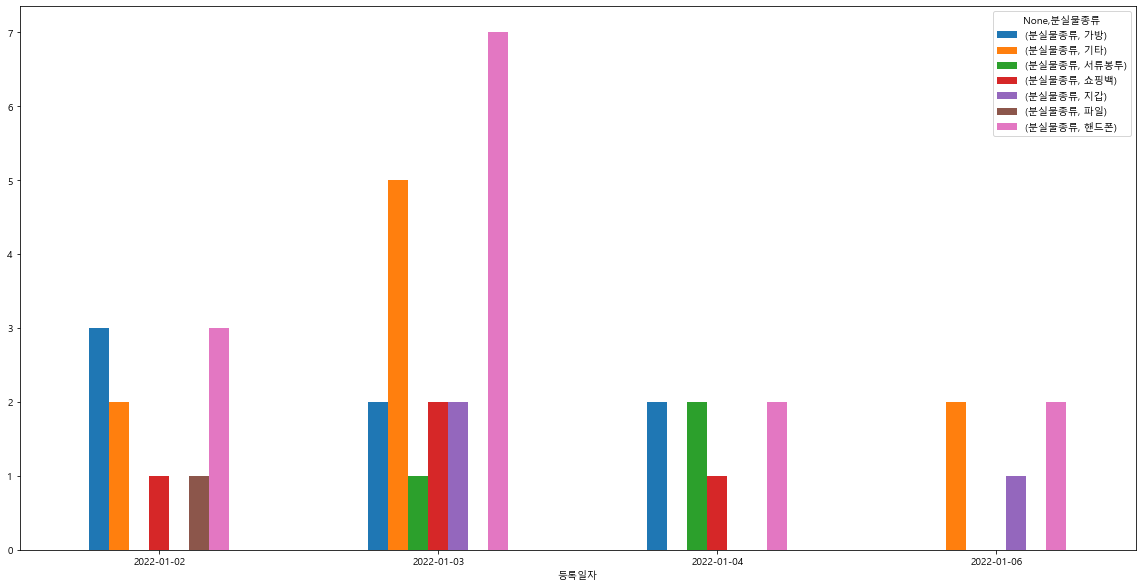

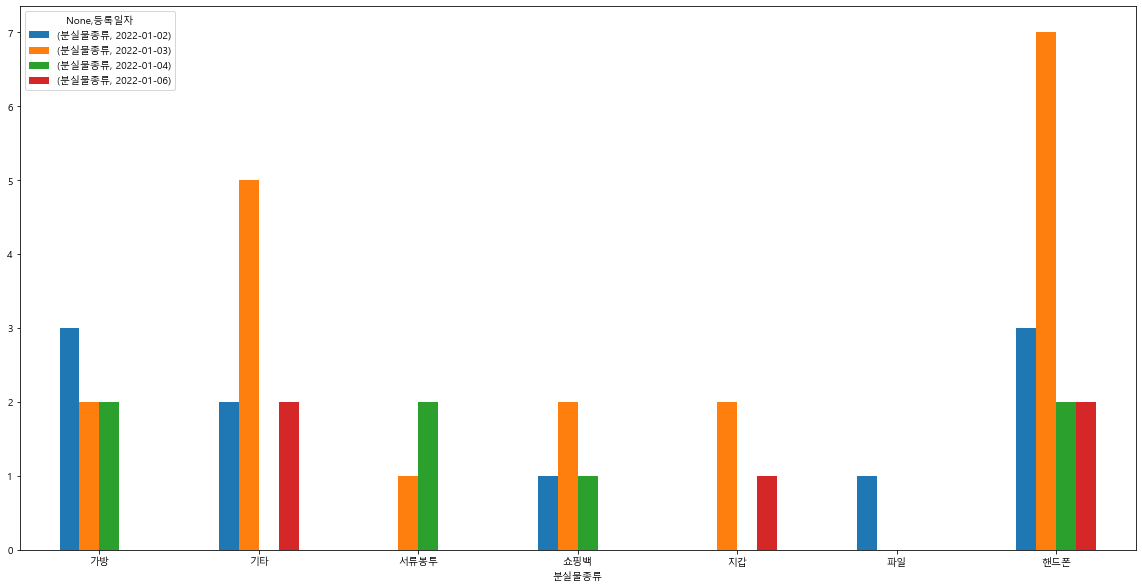

In [275]:
Recent_new = Recent.groupby(['등록일자','분실물종류'])['분실물종류'].count()
Recent_new = pd.DataFrame(Recent_new)
Rc = Recent_new.unstack(level=1, fill_value=None)
Rc.plot.bar(rot = 0, figsize=(20,10))

Rs = Recent_new.unstack(level=0, fill_value=None)
Rs.plot.bar(rot = 0, figsize=(20,10))

plt.show()

<AxesSubplot:xlabel='분실물종류'>

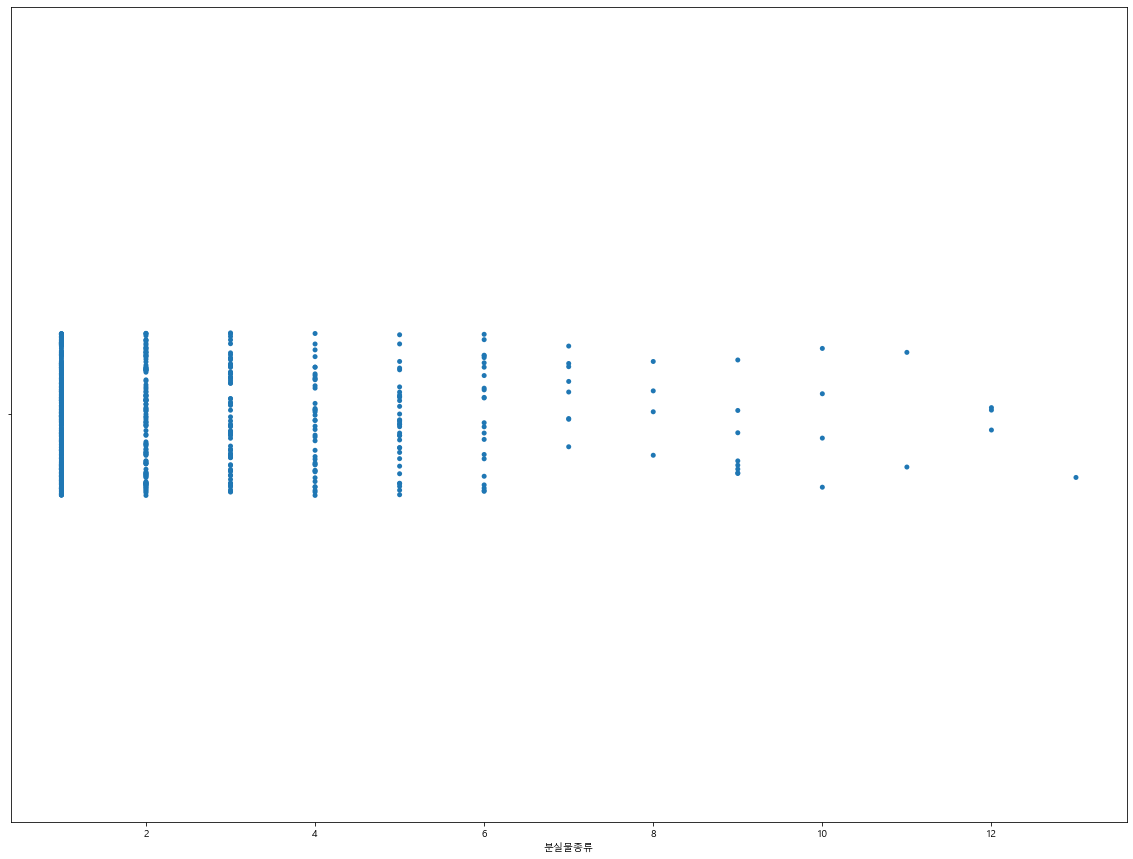

In [455]:
sns.stripplot(x = years_new['분실물종류'])

## 월별 분실물 종류별 합계

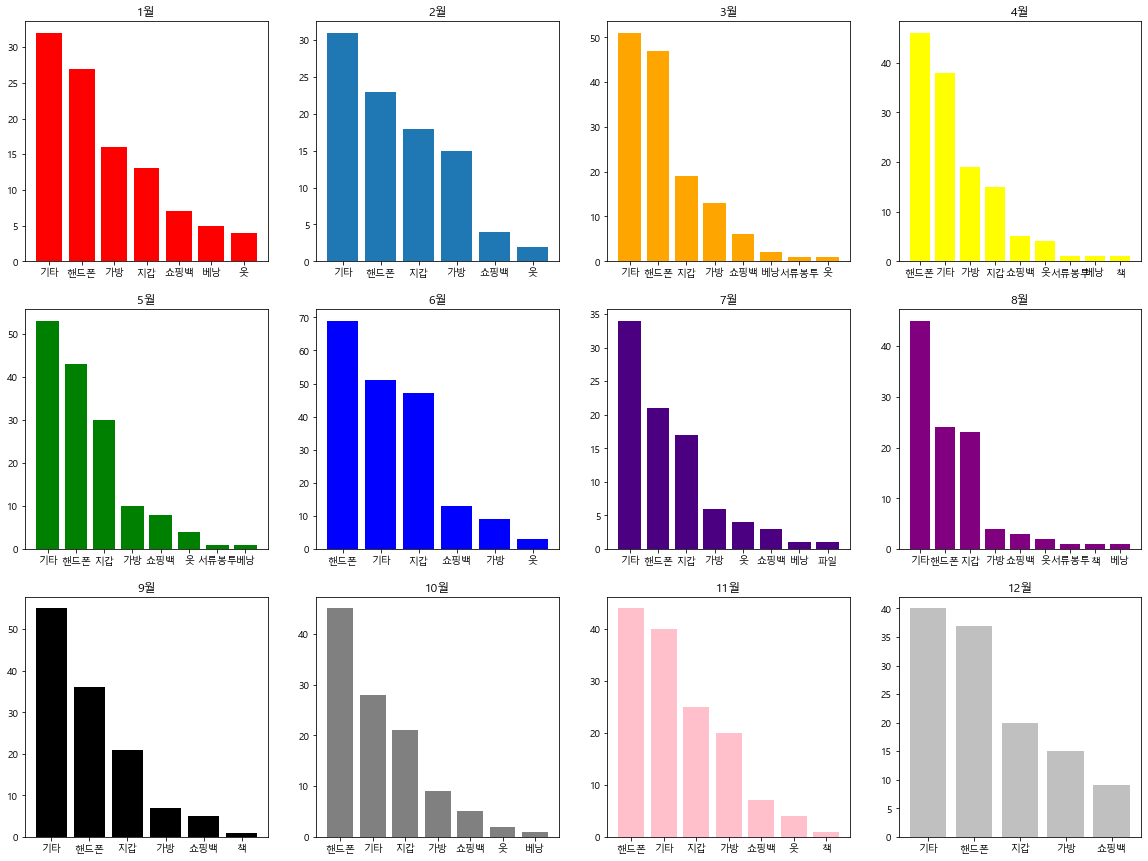

In [414]:
plt.subplot(3, 4, 1)
plt.bar(January_df['1월'],January_df['합계'], color = 'red')
plt.title("1월")

plt.subplot(3, 4, 2)
plt.bar(February_df['2월'],February_df['합계'])
plt.title("2월")
plt.subplot(3, 4, 3)
plt.bar(March_df['3월'],March_df['합계'], color = 'orange')
plt.title("3월")
plt.subplot(3, 4, 4)
plt.bar(April_df['4월'],April_df['합계'], color = 'yellow')
plt.title("4월")
plt.subplot(3, 4, 5)
plt.bar(May_df['5월'],May_df['합계'], color = 'green')
plt.title("5월")
plt.subplot(3, 4, 6)
plt.bar(June_df['6월'],June_df['합계'], color = 'blue')
plt.title("6월")
plt.subplot(3, 4, 7)
plt.bar(July_df['7월'],July_df['합계'], color = 'indigo')
plt.title("7월")
plt.subplot(3, 4, 8)
plt.bar(August_df['8월'],August_df['합계'], color = 'purple')
plt.title("8월")
plt.subplot(3, 4, 9)
plt.bar(September_df['9월'],September_df['합계'], color = 'black')
plt.title("9월")
plt.subplot(3, 4, 10)
plt.bar(October_df['10월'],October_df['합계'], color = 'gray')
plt.title("10월")
plt.subplot(3, 4, 11)
plt.bar(November_df['11월'],November_df['합계'], color = 'pink')
plt.title("11월")
plt.subplot(3, 4, 12)
plt.bar(December_df['12월'],December_df['합계'], color = 'silver')
plt.title("12월")
plt.show()

## 1년 분실물 종류별 합계

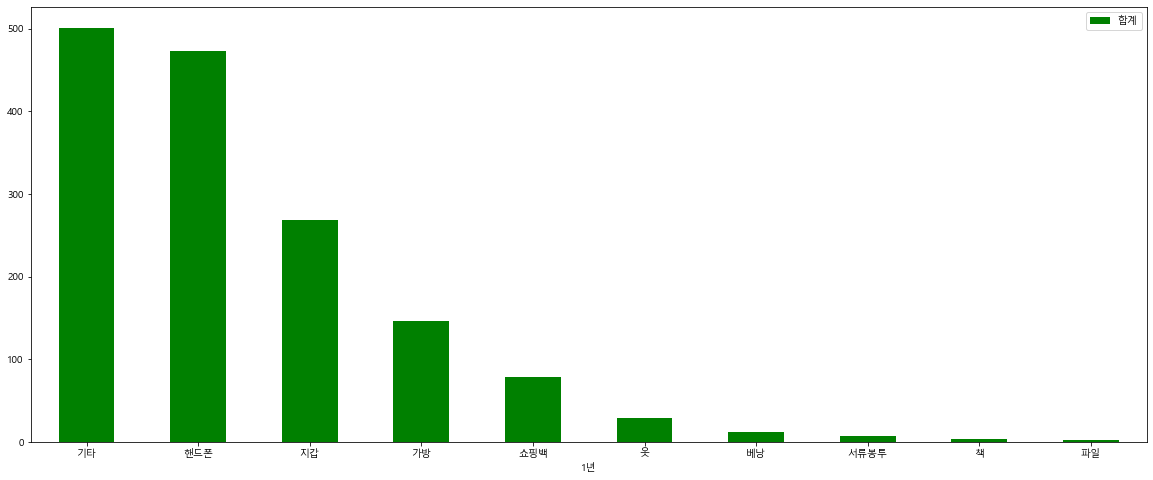

In [408]:
years_df.plot.bar(x='1년', y='합계', rot=0, color = 'green',figsize = (20, 8))
plt.show()

## 월별 분실물 총 합계 막대그래프

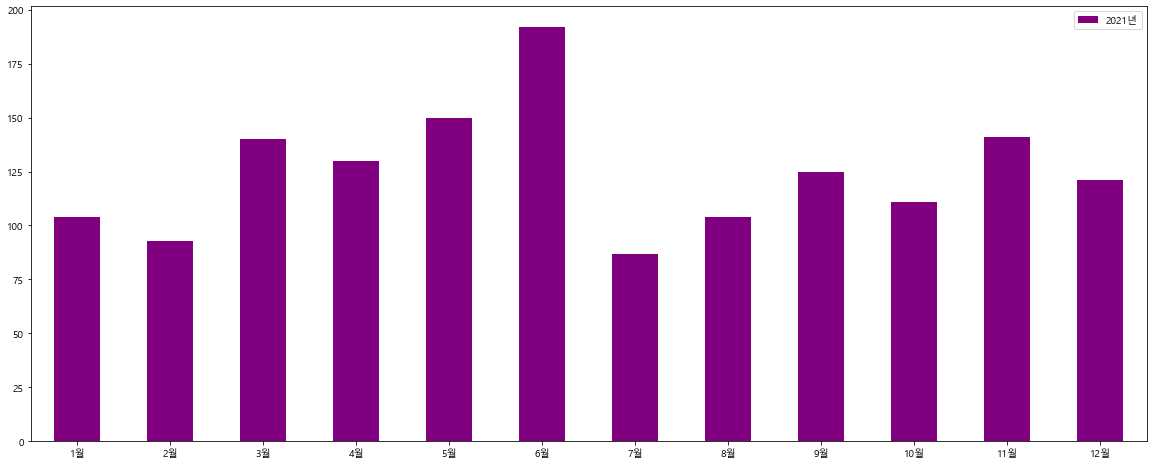

In [418]:
col_name = ["2021년"]
sum_list = [January['분실물종류'].value_counts().sum(), February['분실물종류'].value_counts().sum(), March['분실물종류'].value_counts().sum(),April['분실물종류'].value_counts().sum(),May['분실물종류'].value_counts().sum(), June['분실물종류'].value_counts().sum(), July['분실물종류'].value_counts().sum(), August['분실물종류'].value_counts().sum(), September['분실물종류'].value_counts().sum(), October['분실물종류'].value_counts().sum(), November['분실물종류'].value_counts().sum(), December['분실물종류'].value_counts().sum()]
sum_df = pd.DataFrame(sum_list, columns=col_name, index = ["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"])

sum_df.plot.bar(rot=0, color = 'purple', figsize = (20, 8))
plt.show()

### seaborn의 barplot 사용하면

<AxesSubplot:xlabel='월', ylabel='2021년'>

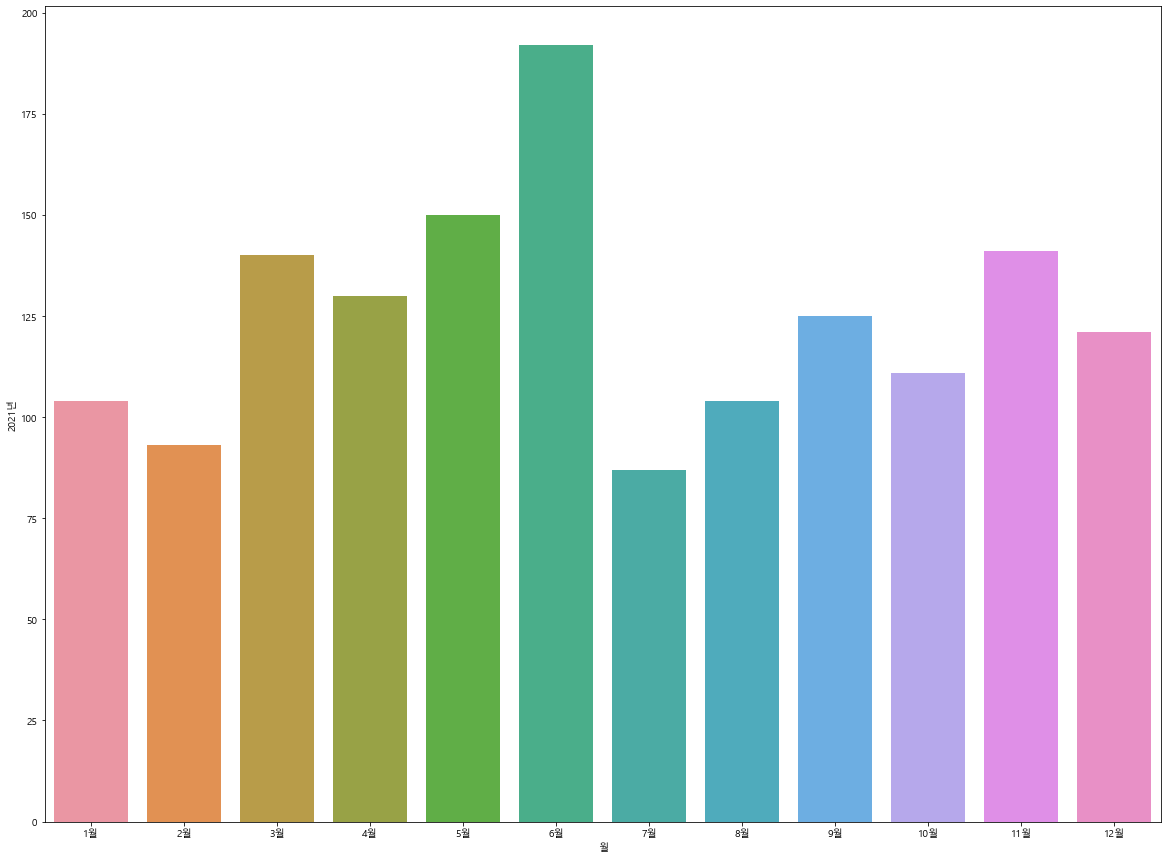

In [422]:
sum_rs = sum_df.reset_index()
sum_rs = sum_rs.rename(columns={'index':'월'})
sns.barplot(data=sum_rs, x="월", y = "2021년")

## 월별 분실물의 종류별 빈도를 나타낸 파이차트

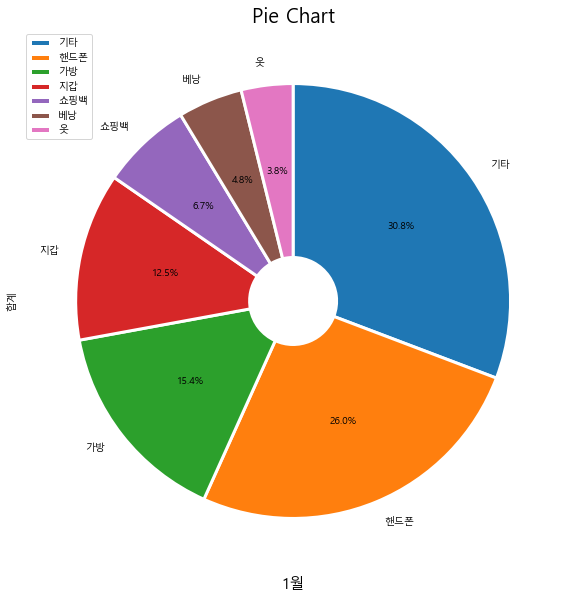

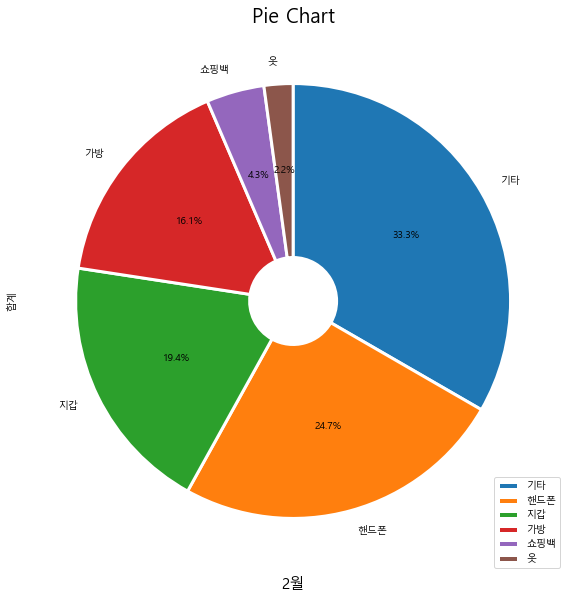

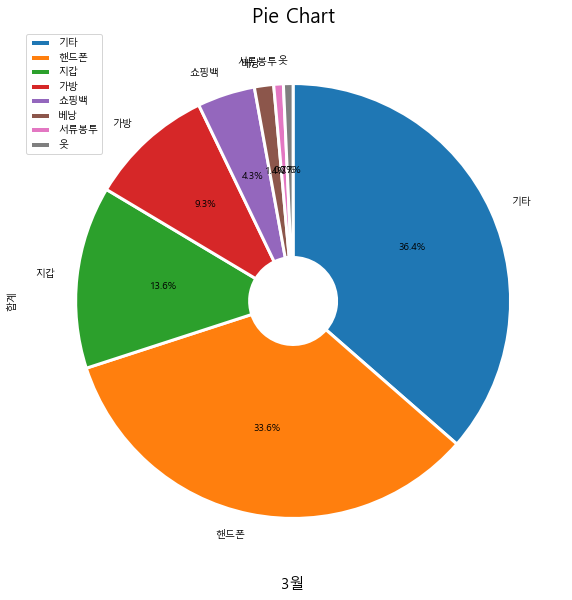

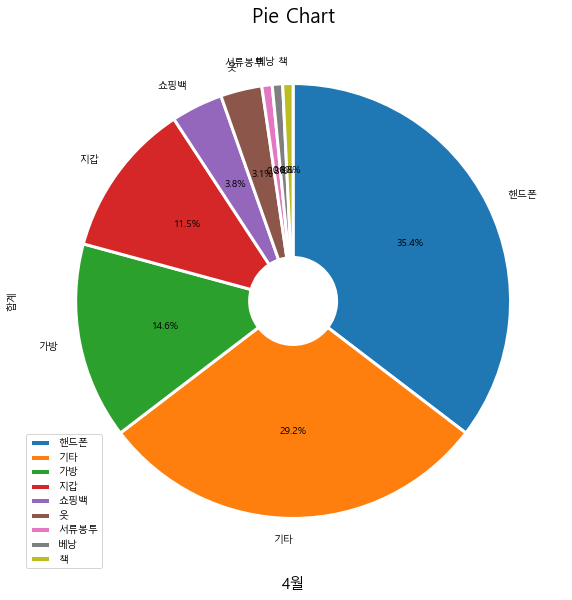

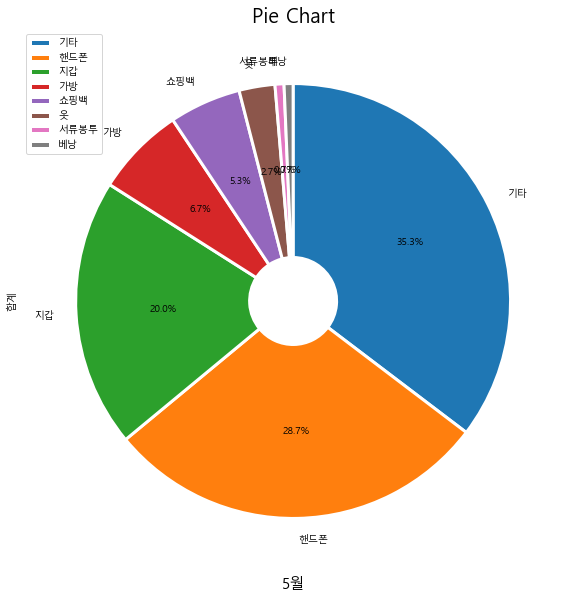

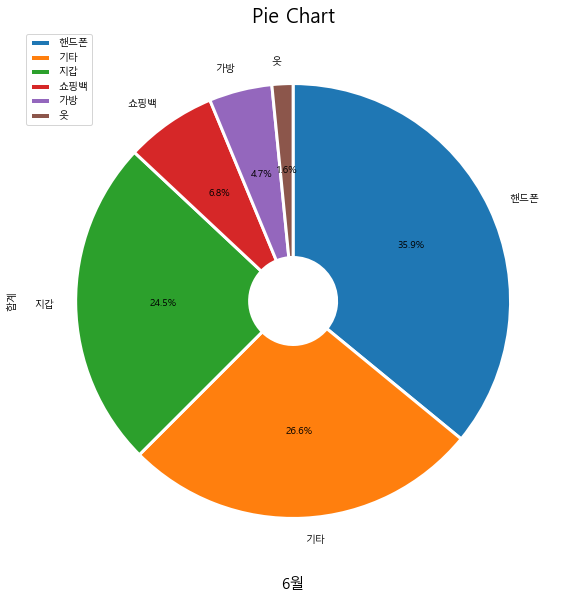

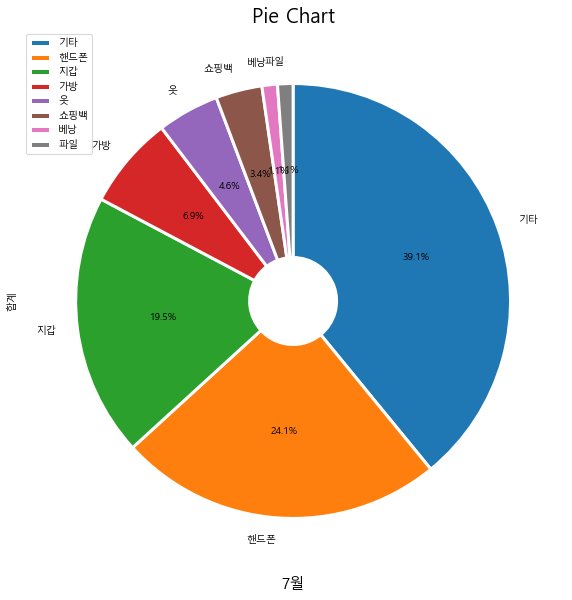

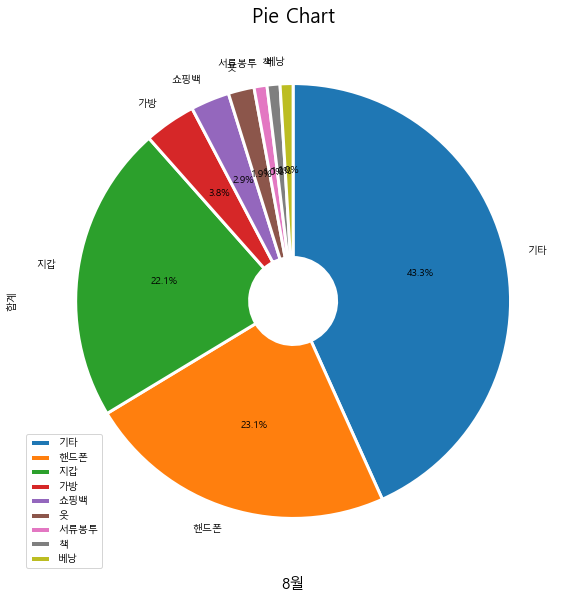

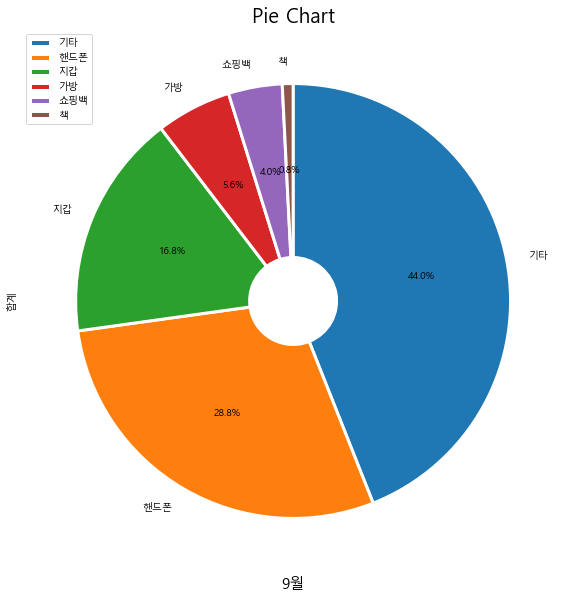

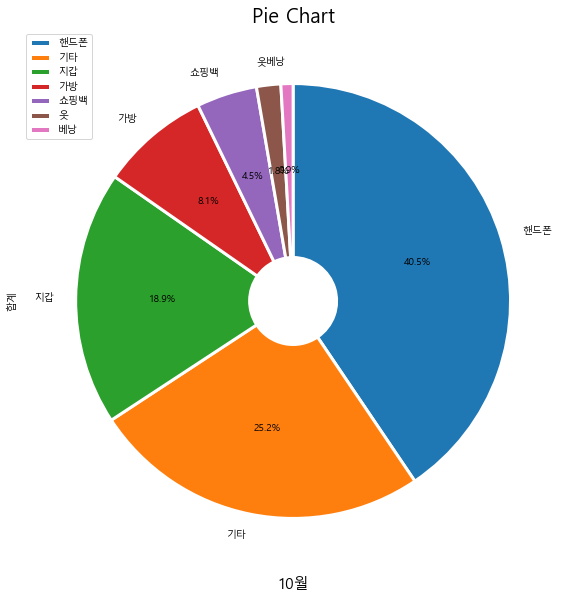

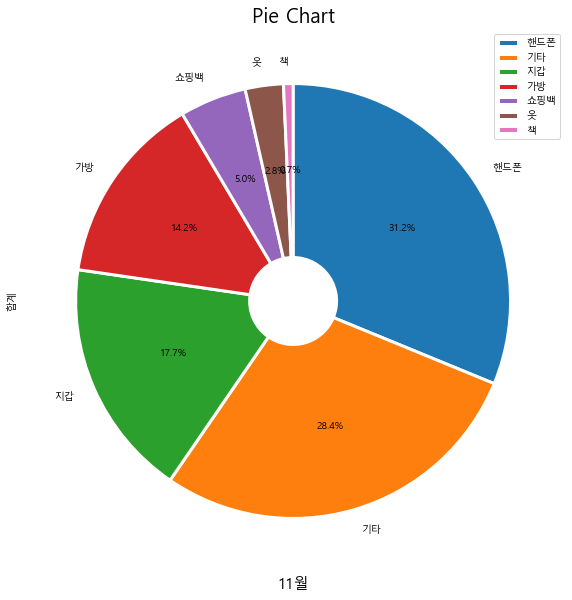

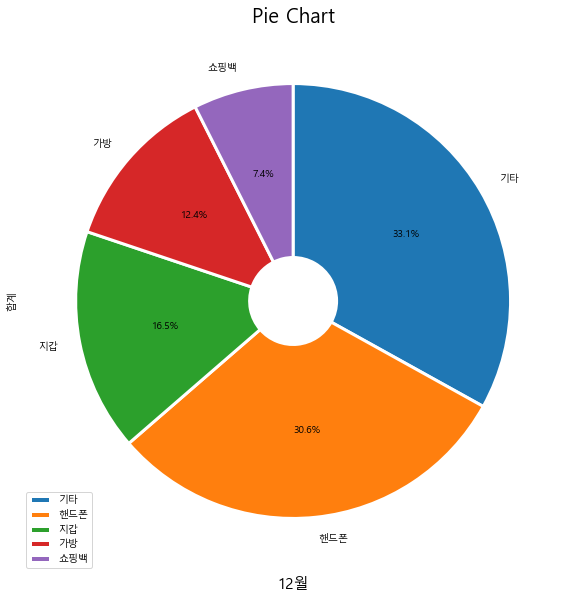

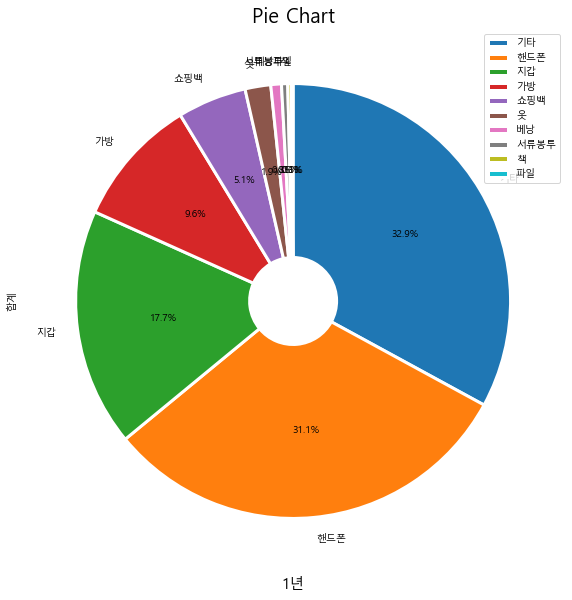

In [423]:
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}

January_df.plot.pie(x = '1월', y = '합계', labels = January_df['1월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("1월",fontsize=15)

February_df.plot.pie(x = '2월', y = '합계', labels = February_df['2월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("2월",fontsize=15)

March_df.plot.pie(x = '3월', y = '합계', labels = March_df['3월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("3월",fontsize=15)

April_df.plot.pie(x = '4월', y = '합계', labels = April_df['4월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("4월",fontsize=15)

May_df.plot.pie(x = '5월', y = '합계', labels = May_df['5월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("5월",fontsize=15)

June_df.plot.pie(x = '6월', y = '합계', labels = June_df['6월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("6월",fontsize=15)

July_df.plot.pie(x = '7월', y = '합계', labels = July_df['7월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("7월",fontsize=15)

August_df.plot.pie(x = '8월', y = '합계', labels = August_df['8월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("8월",fontsize=15)

September_df.plot.pie(x = '9월', y = '합계', labels = September_df['9월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("9월",fontsize=15)

October_df.plot.pie(x = '10월', y = '합계', labels = October_df['10월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("10월",fontsize=15)

November_df.plot.pie(x = '11월', y = '합계', labels = November_df['11월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("11월",fontsize=15)

December_df.plot.pie(x = '12월', y = '합계', labels = December_df['12월'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
# plt.pie(December_df['합계'], labels = December_df['12월'], startangle = 90, counterclock = False, autopct = '%1.1f%%', wedgeprops=wedgeprops) #이런식으로도 표현가능
plt.title("Pie Chart", fontsize=20)
plt.xlabel("12월",fontsize=15)

years_df.plot.pie(x = '1년', y = '합계', labels = years_df['1년'], startangle = 90, counterclock = False, autopct = '%1.1f%%',figsize=(10,10), wedgeprops=wedgeprops)
plt.title("Pie Chart", fontsize=20)
plt.xlabel("1년",fontsize=15)

plt.show()